In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"packages"))
print os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import getimage
import geocoder
import reverse_geocoder as rg # Offline geocoder
import conversion
import improcess
import pandas as pd
reload(getimage)
reload(improcess)

/Users/shijia/Documents/@UCSD/Courses/Spring2018/ECE143/Project/night-flare-Shijia


<module 'improcess' from '/Users/shijia/Documents/@UCSD/Courses/Spring2018/ECE143/Project/night-flare-Shijia/packages/improcess.pyc'>

Demo for `get_image()`

In [ ]:
im = getimage.get_image(tileMatrix=6, tileCol=13, tileRow=12, date="2017-10-10") #Oregon Area
im = np.array(im)
print (im.shape)
plt.imshow(im)

Demo for the image processing

In [ ]:
im = improcess.get_processed_image(tileMatrix=5, tileCol=7, tileRow=5)
im2 = improcess.get_processed_image(tileMatrix=5, tileCol=6, tileRow=5)
plt.imshow(np.concatenate((np.array(im2), np.array(im)), axis = 1))

In [ ]:
mask = getimage.get_mask(tileMatrix=5, tileCol=6, tileRow=5)
mask
plt.imshow(mask)

To show the region of interests by providing the latitude and longtitude

tileMatrix = 6
tileRow = 12 tileCol = 13


/Users/shijia/anaconda2/envs/ECE143/lib/python2.7/site-packages/scipy/signal/signaltools.py:940: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/Users/shijia/anaconda2/envs/ECE143/lib/python2.7/site-packages/scipy/signal/signaltools.py:940: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


(512, 1024)


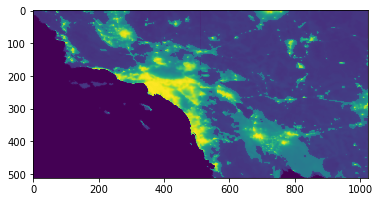

In [3]:
tileMatrix = 6
#latitude, longtitude = (34.031598, -118.229542) # Los Angeles
latitude, longtitude = (32.874673, -117.222538) # La Jolla
#latitude, longtitude = (39.881664, 116.426270) # Beijing

tileRow, tileCol = conversion.get_tile_info(latitude, longtitude, tileMatrix)
print "tileMatrix =", tileMatrix
print "tileRow =",tileRow, "tileCol =", tileCol
date = "2017-10-31"
#print getimage._build_url(tileMatrix, tileCol, tileRow, date)
im1 = improcess.get_processed_image(tileMatrix=tileMatrix, tileCol=tileCol, tileRow=tileRow, start_date="2017-10-01")
im2 = improcess.get_processed_image(tileMatrix=tileMatrix, tileCol=tileCol+1, tileRow=tileRow, start_date="2017-10-01")
im = np.concatenate((im1, im2), axis=1)
#im = np.array(im1)
print (im.shape)
plt.imshow(im)
mask = getimage.get_mask(tileMatrix=tileMatrix, tileCol=tileCol, tileRow=tileRow)
mask2 = getimage.get_mask(tileMatrix=tileMatrix, tileCol=tileCol + 1, tileRow=tileRow)
mask = np.concatenate((np.array(mask), np.array(mask2)), axis = 1)

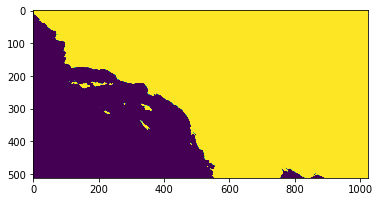

In [4]:
plt.imshow(mask)

In [6]:
reload(conversion)
#tileMatrix = 5
#tileRow, tileCol = 5, 6
print im.shape
results = conversion.geodecode_region(tileMatrix, tileCol, tileRow, im, mask)


(512, 1024)
Loading formatted geocoded file...
{'name': 'Peach Springs', 'cc': 'US', 'lon': '-113.42549', 'admin1': 'Arizona', 'admin2': 'Mohave County', 'lat': '35.52916'}
(36.0, -121.5)


In [109]:
#results.to_csv('tmp_list.csv', sep=',')
results.keys()
results['Light Pollution'].count()
results_US = results[results['Country'] == 'US']
print "The total pixel locations in US: ", results_US['Light Pollution'].count()

The total pixel locations in US:  314436


In [110]:
results_US.head()

,Light Pollution,Region,County,State,Country,Region Coordinate,Latitude,Longtitude
0,22.176084,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.0,-121.500000
1,26.011028,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.0,-121.491211
2,27.894602,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.0,-121.482422
3,27.259248,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.0,-121.473633
4,26.979813,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.0,-121.464844


Statistics on the Light Pollution on different states

In [111]:
stats = results_US['Light Pollution'].groupby(results_US['County']).describe(include='all')
stats.sort_values(by=['mean'], ascending=False, inplace=True)
stats

,count,mean,std,min,25%,50%,75%,max
County,,,,,,,,
Orange County,2936.0,212.062370,46.162084,3.473442,187.466755,230.006972,246.713600,254.152000
Los Angeles County,12617.0,169.020654,67.762694,4.271557,119.380898,165.765982,239.856000,254.870400
San Diego County,11708.0,124.562523,71.283437,3.155412,47.884600,119.090651,189.008059,252.178884
Ventura County,4745.0,116.069737,70.345056,4.577150,42.404000,118.977734,178.394375,248.856333
Riverside County,21811.0,106.484792,68.230086,38.591200,45.526000,98.449360,161.485608,254.577600
Tulare County,3245.0,90.638386,42.917873,26.697119,46.440000,103.521059,124.413615,215.185885
Imperial County,13043.0,90.211430,46.562704,37.589600,45.276800,101.688851,120.745252,253.664000
Kern County,36908.0,79.917911,51.447435,25.026939,41.115800,47.091200,118.758291,249.614400
Yuma County,16791.0,75.472360,43.252887,40.222400,45.155600,49.344800,107.478400,249.712995


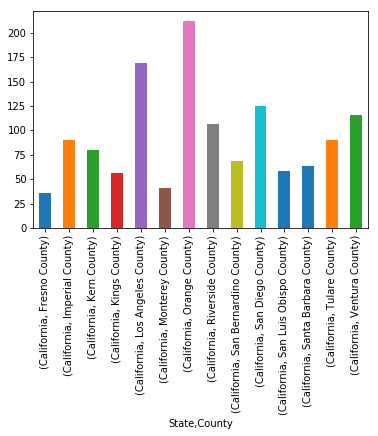

In [112]:
cali_mean = results[results['State'] == 'California'].groupby(['State','County'])['Light Pollution'].mean()
cali_mean.plot('bar')

In [123]:
mean = stats['mean'].to_frame()
tmp = pd.merge(results_US, mean, on='County', how='right')
tmp[tmp['State'] == 'California']

,Light Pollution,Region,County,State,Country,Region Coordinate,Latitude,Longtitude,mean
0,22.176084,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.500000,40.945881
1,26.011028,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.491211,40.945881
2,27.894602,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.482422,40.945881
3,27.259248,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.473633,40.945881
4,26.979813,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.464844,40.945881
5,26.636437,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.456055,40.945881
6,26.195017,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.447266,40.945881
7,26.090817,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.438477,40.945881
8,25.909418,Greenfield,Monterey County,California,US,"(36.3208, -121.24381)",36.000000,-121.429688,40.945881
9,25.995818,King City,Monterey County,California,US,"(36.21274, -121.12603)",36.000000,-121.420898,40.945881


,mean
County,
Orange County,212.062370
Los Angeles County,169.020654
San Diego County,124.562523
Ventura County,116.069737
Riverside County,106.484792
Tulare County,90.638386
Imperial County,90.211430
Kern County,79.917911
Yuma County,75.472360


In [120]:
a = pd.DataFrame(np.arange(5))
b = pd.DataFrame(np.arange(4))
pd.merge(a,b,on=0)

,0
0,0
1,1
2,2
3,3


Analysis:

* Top 10 most light polluted counties.
* The temporal trend of the average light pollution in California
* Mark the average light pollution on the map
* Correlation between the population and light pollution level (heatmap)

In [ ]:
region_map = []
loc_dict = dict()
cnt = 0
color = range(256)
for loc in results:
    if loc['name'] not in loc_dict:
        cnt += 1
        loc_dict[loc['name']] = np.random.choice(color)
    region_map.append(loc_dict[loc['name']])
    loc_dict[loc['name']] += 1

In [ ]:
region_map = np.array(region_map).reshape(512,512)

In [ ]:
%matplotlib tk
fig1, ax1 = plt.subplots()
plt.imshow(region_map[:350, 400:], cmap='gray')
print region_map[:350, 400:]

In [ ]:
fig2, ax2 = plt.subplots()
plt.imshow(im[:350,400:])
region_map[450:, 450:]

[Geocoder Documentation](http://geocoder.readthedocs.io/api.html#install)


```python
import geocoder
geocoder.google("453 Booth Street, Ottawa ON").housenumber```

[reverse-geocoder Documentaion](https://github.com/thampiman/reverse-geocoder)

```python
import reverse_geocoder as rg

coordinates = (32.874,-117.223)#, (32.765370, -117.023632)#,(9.936033, 76.259952),(37.38605,-122.08385)
results = rg.search(coordinates)
print results[0]```


[google-maps-services-python](https://github.com/googlemaps/google-maps-services-python)

In [ ]:
getimage.__file__

In [ ]:
!ls

In [ ]:
!cat getimage.py

In [118]:

import reverse_geocoder as rg

coordinates = (32.94140625, -114.741210938)#, (32.765370, -117.023632)#,(9.936033, 76.259952),(37.38605,-122.08385)
results = rg.search(coordinates)
print results[0]

{'name': 'Los Algodones', 'cc': 'MX', 'lon': '-114.73333', 'admin1': 'Baja California', 'admin2': '', 'lat': '32.7'}
